#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?

Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?

Why is it not possible to use the accuracy as loss function?

What is the defined `mnist_loss` function doing? 


```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```

Why do we need additionaly the sigmoid() function? What is it technically in our TLU?

Again, what are mini batches, why are we using them and why should they be shuffeld? 

In the chapter "The MNIST Loss Function," torch.cat() is utilized to combine mini-batches of images, and view(-1, 28*28) is used to flatten the image tensors. torch.cat() concatenates tensors along an existing axis, while view() reshapes the tensor. Using -1 as an argument in view() infers the size of that dimension from the tensor's size and the remaining dimensions.

The neural network manually trained in the "The MNIST Loss Function" chapter contains two layers - an input layer with 784 neurons representing the flattened 28x28 images, and an output layer with x neurons representing the ten possible digit classes. The sigmoid activation function is used in the network, and stochastic gradient descent is utilized for training.

It is not possible to use accuracy as a loss function because it is not a smooth function of the model parameters, so gradient-based methods like stochastic gradient descent cannot optimize it. In contrast, loss functions are smooth and can be optimized using gradient-based methods.

The mnist_loss function, which is defined in the "The MNIST Loss Function" chapter, computes the negative log-likelihood of the predicted class probabilities given the true class labels. It first applies the log_softmax function to the neural network's output, which converts the output to log probabilities. It then selects the log probability corresponding to the true class label for each example. Finally, it calculates the negative mean of these log probabilities, which is the loss function to be minimized during training.

The activation function used in the first layer of the manually trained neural network in "The MNIST Loss Function" chapter is sigmoid(). It is applied to the weighted sum of input features and maps it to a value between 0 and 1, which represents the probability of the corresponding output class.

Mini-batches are a subset of the training data processed at a time during training instead of the entire dataset. Mini-batches allow more frequent updating of model parameters and save memory. It also helps to regularize the model by introducing noise in parameter updates.

Shuffling the mini-batches during training is crucial to prevent the model from learning the order of the training data. Without shuffling, the model may overfit to the training data and perform poorly on new data. Shuffling ensures that the model learns robust features by seeing a random subset of data in each epoch.

#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [18]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')
     

path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
#load the 3s and sevens from the dataset 
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
#list comprehension to append images to list
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
#edit the to relativate pixel value 
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
#convert to pytorch tensors 
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

threes = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
threes = threes.float()/255
sevens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
sevens = sevens.float()/255
valid_x = torch.cat([threes, sevens]).view(-1, 28*28)
valid_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

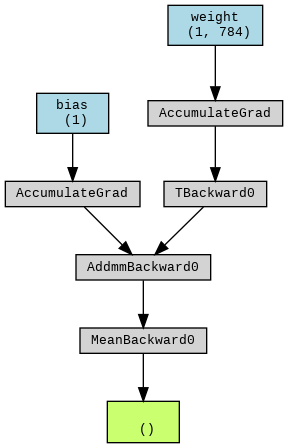

In [14]:
import torch
import torch.nn as nn
from torchviz import make_dot

# Define the linear model
lm = nn.Linear(28*28,1)

# Generate a random input tensor for the model
valid_x = torch.randn(1, 28*28)

# Pass the input tensor through the model and visualize the computation graph
output = lm(valid_x).mean()
make_dot(output, params=dict(lm.named_parameters())).render("linear_model_graph", format="png")

# Display the visualization
from IPython.display import Image
Image(filename="linear_model_graph.png")


In [26]:

def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#constructing the neural network 
def linear1(xb): return xb@weights + bias

#return the difference between the prediction and the sigmoid value
def loss_(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# self explaining
def gradient_descent(xb, yb, model):
    preds = model(xb)
    loss = loss_(preds, yb)
    loss.backward()

#define the training epoch 
def train_net(model, lr, params):
    for xb,yb in dl:
        gradient_descent(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

# Weights and bias
weights = init_params((28*28,1))
bias = init_params(1)
# The data sets and data loaders for both training and validation.
dl = DataLoader(list(zip(train_x,train_y)), batch_size=256)
valid_dl = DataLoader(list(zip(valid_x,valid_y)), batch_size=256)

# training loop for 100 epochs
for i in range(100):
    train_net(linear1, 1.0, (weights,bias))

In [27]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()


dl = DataLoader(list(zip(train_x,train_y)), batch_size=256)
valid_dl = DataLoader(list(zip(valid_x,valid_y)), batch_size=256)
